In [416]:
from skimage import data
from skimage import measure

import numpy as np
import matplotlib.pyplot as plt

from shapely.geometry import Polygon, MultiPoint, Point, MultiPolygon

from skimage.draw import ellipse

from shapely.affinity import skew, affine_transform, translate, rotate, scale
from shapely.ops import triangulate, cascaded_union
from descartes.patch import PolygonPatch

In [144]:
# Construct some test data
x, y = np.ogrid[-np.pi:np.pi:100j, -np.pi:np.pi:100j]
r = np.sin(np.exp((np.sin(x)**3 + np.cos(y)**2)))

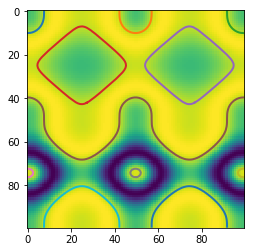

In [145]:
# Find contours at a constant value of 0.8
contours = measure.find_contours(r, 0.8)

# Display the image and plot all contours found
plt.imshow(r, interpolation='nearest')

for n, contour in enumerate(contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2)

plt.axis('image')
plt.show()

In [150]:
contours

[array([[9.93902734, 0.        ],
        [9.86521017, 1.        ],
        [9.63842842, 2.        ],
        [9.24067178, 3.        ],
        [9.        , 3.42487608],
        [8.64744355, 4.        ],
        [8.        , 4.80005934],
        [7.80754532, 5.        ],
        [7.        , 5.71101032],
        [6.56942992, 6.        ],
        [6.        , 6.3556701 ],
        [5.        , 6.79944214],
        [4.31568262, 7.        ],
        [4.        , 7.09578373],
        [3.        , 7.28305412],
        [2.        , 7.37835474],
        [1.        , 7.41346629],
        [0.        , 7.41849616]]), array([[ 0.        , 42.09146193],
        [ 1.        , 42.09626078],
        [ 2.        , 42.12974181],
        [ 3.        , 42.2204602 ],
        [ 4.        , 42.39806193],
        [ 5.        , 42.69644371],
        [ 5.67419922, 43.        ],
        [ 6.        , 43.14925559],
        [ 7.        , 43.78701929],
        [ 7.25798509, 44.        ],
        [ 8.        , 44.69

In [44]:
pol = Polygon(contours[4])

In [1232]:
img = np.zeros((10, 12), dtype=np.uint8)
rr, cc = ellipse(5, 6, 3, 5, rotation=np.deg2rad(30))
print(rr, cc)
img[rr, cc] = 1
rr, cc = ellipse(5, 6, 2, 2, rotation=np.deg2rad(30))
img[rr, cc] = 0
contours = measure.find_contours(img, 0.8)

[2 2 2 2 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 7
 7 7 7 7 7 7 8 8 8 8] [ 6  7  8  9  4  5  6  7  8  9 10  3  4  5  6  7  8  9 10  2  3  4  5  6
  7  8  9 10  2  3  4  5  6  7  8  9  2  3  4  5  6  7  8  3  4  5  6]


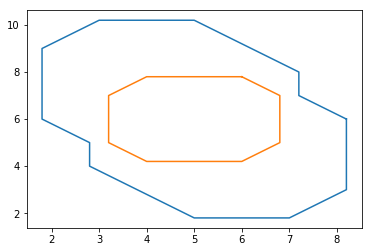

In [72]:
for contour in contours:
    plt.plot(contour[:,0], contour[:,1])

In [84]:
ext = MultiPoint(contours[0])
inter = MultiPoint(contours[1])
pol = Polygon(ext, [inter])

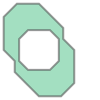

In [91]:
def poly_to_numpy(poly, canvas):
    

In [108]:
pol.contains(MultiPoint([Point(5,3),Point(5,5)]))

False

In [125]:
pol.simplify(1.0, preserve_topology=True)
ext, inter = pol.boundary

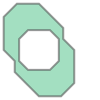

In [133]:
skew(pol)

In [131]:
a = Point(1, 1).buffer(1.5)
b = Point(2, 1).buffer(1.5)
a.union(b).exterior.is_ring

True

In [140]:
centroid = pol.centroid
centroid.xy

(array('d', [4.999999999999997]), array('d', [5.999999999999996]))

In [145]:
exterior = Point([0,0]).buffer(2.0)
interior = Point([0,0]).buffer(1.0)
toroid = exterior.symmetric_difference(interior)

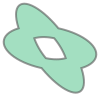

In [175]:
tor1 = scale(toroid, 1, 2, origin='centroid')
tor2 = scale(toroid, 2, 1, origin='centroid')
maple = tor1.union(tor2)
skew(maple, -30, 0)

Image shape: (128, 128)
Labels: [('triangle', ((20, 46), (52, 82))), ('triangle', ((10, 46), (7, 48))), ('circle', ((55, 98), (1, 44))), ('rectangle', ((89, 124), (48, 91)))]


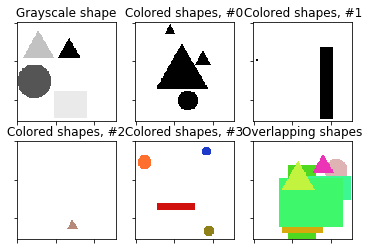

In [87]:
import matplotlib.pyplot as plt

from skimage.draw import random_shapes

# Let's start simple and generate a 128x128 image
# with a single grayscale rectangle.
result = random_shapes((128, 128), min_shapes=1, max_shapes=4,
                       multichannel=False, min_size=30)

# We get back a tuple consisting of (1) the image with the generated shapes
# and (2) a list of label tuples with the kind of shape (e.g. circle,
# rectangle) and ((r0, r1), (c0, c1)) coordinates.
image, labels = result
print('Image shape: {}\nLabels: {}'.format(image.shape, labels))

# We can visualize the images.
fig, axes = plt.subplots(nrows=2, ncols=3)
ax = axes.ravel()
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Grayscale shape')

# The generated images can be much more complex. For example, let's try many
# shapes of any color. If we want the colors to be particularly light, we can
# set the `intensity_range` to an upper subrange of (0,255).
image1, _ = random_shapes((128, 128), max_shapes=5,min_size=10,
                          intensity_range=((1, 1),))

# Moar :)
image2, _ = random_shapes((128, 128), max_shapes=5,
                          intensity_range=((1, 1),))
image3, _ = random_shapes((128, 128), max_shapes=10,
                          intensity_range=((50, 255),))
image4, _ = random_shapes((128, 128), max_shapes=10,
                          intensity_range=((0, 255),))

for i, image in enumerate([image1, image2, image3, image4], 1):
    ax[i].imshow(image)
    ax[i].set_title('Colored shapes, #{}'.format(i-1))

# These shapes are well suited to test segmentation algorithms. Often, we
# want shapes to overlap to test the algorithm. This is also possible:
image, _ = random_shapes((128, 128), min_shapes=5, max_shapes=10,
                         min_size=20, allow_overlap=True)
ax[5].imshow(image)
ax[5].set_title('Overlapping shapes')

for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])

plt.show()

[('rectangle', ((21, 32), (0, 23))), ('rectangle', ((4, 18), (30, 32))), ('rectangle', ((30, 32), (25, 32))), ('rectangle', ((11, 19), (17, 26)))]


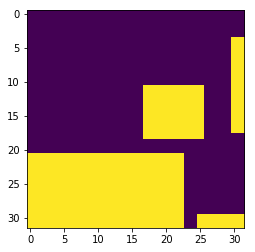

In [164]:
image, labels = random_shapes((32,32),multichannel=False, max_shapes=5, min_shapes=1, intensity_range=((1, 1)), shape='rectangle')
print(labels)
idx = image == 255
image[idx] = 0
plt.imshow(image)

In [141]:
rect = rectangle([1,1],1,1)
ell = ellipse([1,1],0.5,0.5)
x = np.linspace(0,5,250)
y = np.linspace(0,5,250)
xx, yy = np.meshgrid(x,y)
mesh = np.stack([xx,yy],axis=-1)
mask1 = to_numpy(mesh, rect)
mask2 = to_numpy(mesh, ell)

In [153]:
image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [165]:
np.random.randint?

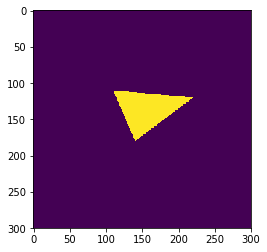

In [361]:
from skimage.draw import polygon
img = np.zeros((300, 300), dtype=np.uint8)
img_with_b = np.zeros(3*np.array(img.shape), dtype=np.uint8)
r = np.array([10, 20, 80])
c = np.array([10, 120, 40])
rr, cc = polygon(r+np.array(100), c+np.array(100), shape=img_with_b.shape)
img[rr, cc] = 1
plt.imshow(img)

In [417]:
def rectangle(xy_c, wx, wy=None, rotation=0):
    if wy is None:
        wy = wx
    x = np.zeros(4, dtype=float)
    y = np.zeros(4, dtype=float)
    x[0],y[0] = np.array(xy_c) - np.array([wx/2.,wy/2.])
    x[1],y[1] = np.array([x[0],y[0]+wy])
    x[2],y[2] = np.array([x[0]+wx,y[0]+wy])
    x[3],y[3] = np.array([x[0]+wx,y[0]])
    pol = Polygon(MultiPoint(list(zip(x,y))))
    pol = rotate(pol,rotation, origin='centroid')
    return pol
    
def ellipse(xy_c, wx, wy=None, rotation=0):
    if wy is None:
        wy = wx
    pol = Point(xy_c).buffer(1.0)
    pol = scale(pol,wx,wy)
    pol = rotate(pol,rotation, origin='centroid')
    return pol

def ring(xy_c, wxy_e, wxy_i, rotation=0):
    """Interior domain is greater than exterior"""
    if np.any(wxy_e<wxy_i):
        raise ValueError("Interior domain is greater than exterior")
    exterior = ellipse(xy_c, *wxy_e, rotation=rotation)
    interior = ellipse(xy_c, *wxy_i, rotation=rotation)
    pol = exterior.symmetric_difference(interior)
    return pol

def polygon(points):
    points = MultiPoints(points)
    pol = Polygon(points)
    return pol

def shoe(xy_c, wxy_e, wxy_i, rotation=0):
    try:
        wy_e = wxy_e[1]
    except IndexError:
        wy_e = wxy_e[0]
    try:
        wy_i = wxy_i[1]
    except IndexError:
        wy_i = wxy_i[0]
    """Interior domain is greater than exterior"""
    if np.any(wxy_e<wxy_i):
        raise ValueError("Interior domain is greater than exterior")
    exterior = rectangle(xy_c, *wxy_e)
    interior = rectangle(xy_c, *wxy_i)
    interior = translate(interior,0,(wy_e-wy_i)/2.)
    pol = exterior.symmetric_difference(interior)
    pol = rotate(pol, rotation)
    return pol

def cross(xy_c, wx, wy, rotate1=90, rotate2=0):
    rec1 = rectangle(xy_c, wx, wy)
    rec2 = rectangle(xy_c, wx, wy, rotate1)
    pol = rec1.union(rec2)
    pol = rotate(pol, rotate2, origin='centroid')
    return pol

def pie(xy_c, r_ext, r_int, angle=90, rotation=0):
    phi = np.linspace(0,2*np.pi,100)
    idx = (phi<=(angle+rotation) / 180 * np.pi) * (phi>=(rotation) / 180 * np.pi)
    phi = phi[idx]
    x_ext = r_ext*np.cos(phi)
    y_ext = r_ext*np.sin(phi)
    x_int = r_int*np.cos(phi)
    y_int = r_int*np.sin(phi)
    x_ext=np.insert(x_ext,0,0)
    y_ext=np.insert(y_ext,0,0)
    x_int=np.insert(x_int,0,0)
    y_int=np.insert(y_int,0,0)
    ext = MultiPoint(list(zip(x_ext,y_ext)))
    inter = MultiPoint(list(zip(x_int,y_int)))
    pol_ext = Polygon(ext)
    pol_int = Polygon(inter)
    pol = pol_ext.symmetric_difference(pol_int)
    translate(pol,*xy_c)
    return pol

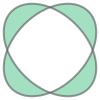

In [381]:
el1 = ellipse(np.array([0,0]),2,3,rotation=45)
el2 = ellipse(np.array([0,0]),2,3,rotation=-45)
el1.symmetric_difference(el2)

In [690]:
cr = shoe(np.array([0,0]),[1],[0.5,0.5], rotation=45)

In [729]:
cr = cross([2.0,2.0],1.0,0.3, rotate2=120)

In [417]:
triangles = triangulate(cr, tolerance=0.0)

In [213]:
def pie(xy_c, r_ext, r_int, angle=90, rotation=0):
    phi = np.linspace(0,2*np.pi,100)
    idx = (phi<=(angle+rotation) / 180 * np.pi) * (phi>=(rotation) / 180 * np.pi)
    phi = phi[idx]
    x_ext = r_ext*np.cos(phi)
    y_ext = r_ext*np.sin(phi)
    x_int = r_int*np.cos(phi)
    y_int = r_int*np.sin(phi)
    x_ext=np.insert(x_ext,0,0)
    y_ext=np.insert(y_ext,0,0)
    x_int=np.insert(x_int,0,0)
    y_int=np.insert(y_int,0,0)
    ext = MultiPoint(list(zip(x_ext,y_ext)))
    inter = MultiPoint(list(zip(x_int,y_int)))
    pol_ext = Polygon(ext)
    pol_int = Polygon(inter)
    pol = pol_ext.symmetric_difference(pol_int)
    translate(pol,*xy_c)
    return pol

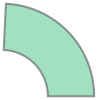

In [214]:
ext = pie([2.,2.],1,0.5, angle=90, rotation=0)
#ext2 = pie(1,0.5, angle=180, rotation=0)
ext

In [531]:
MultiPoint

shapely.geometry.multipoint.MultiPoint

In [513]:
k = np.random.randint(0,3)*5
l = np.random.randint(1,3)
r=np.sin(2*np.pi*phi)+10
x = r*np.cos(phi)
y = r*np.sin(phi)

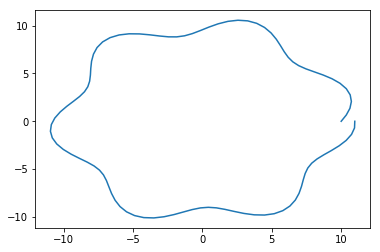

In [514]:
plt.plot(x,y)

In [644]:
canvas = np.zeros([32,32])


In [642]:
ext.contains(Point([0.6,0.6]))

True

In [412]:
def to_numpy(mesh, shape, output=None):
    if output is None:
        output=np.zeros(mesh.shape[:2],np.int)
    for ix, iy in np.ndindex(mesh.shape[:2]):
        point = Point(mesh[ix,iy])
        output[ix,iy] = shape.contains(point)
    return output

def to_numpy2(size, shape, interiors=[], output=None):
    if output is None:
        output=np.zeros(size[:2],np.int)
    exterior = np.rint(np.array(shape.exterior))
    r, c = np.array(exterior)[:,0], np.array(exterior)[:,1]
    rr, cc = polygon(r,c,shape=size)
    output[rr,cc] = 1
    for i, interior in enumerate(shape.boundary):
        interior = np.rint(np.array(interior))
        r, c = np.array(interior)[:,0], np.array(interior)[:,1]
        rr, cc = polygon(r,c,shape=size)
        output[rr,cc] = 0
    return output

def split_ext_int(polygons):
    output = []
    status = ['']*len(polygons)
    for i, poly1 in enumerate(polygons):
        holes_idx = [j for j, poly in enumerate(polygons) 
                     if poly1.contains(poly) and i!=j]
        if holes_idx:
            status[i] = 'shell'
            for hole_idx in holes_idx:
                poly1 = poly1.symmetric_difference(polygons[hole_idx])
                status[hole_idx] = 'hole'
            output.append(poly1)
    output += [poly for (poly,state) in zip(polygons,status) if state=='']
    return output
    
def to_shapely(mesh, canvas):
    contours = measure.find_contours(canvas, 0.95,positive_orientation='low')
    polygons = []
    for contour in contours:
        contour = np.round(contour).astype(np.int)
        contour = [mesh[ix,iy] for ix, iy in contour]
        points = MultiPoint(contour)
        pol = Polygon(points)
        polygons.append(pol)
    polygons = split_ext_int(polygons)
    return polygons

def add_shape(canvas, shape, shape_idx=1):
    print(shape)
    mask = shape == shape_idx
    canvas[mask] = shape_idx
    return canvas

In [418]:
shape_ring = ring([15,15],[10],[5])
shape_ring2 = ring([55,55],[10],[5])
rings = cascaded_union([shape_ring,shape_ring2])
shape_box = rectangle([3.5,3.5],1.0,0.5)
#shapes = to_shapely(mesh, canvas)
#plt.imshow(to_numpy(mesh, shapes[0]))

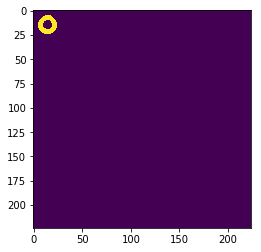

In [399]:
img = to_numpy2([224,224],shape_ring)
plt.imshow(img)

In [409]:
np.array(shape_ring.boundary[1])

array([[20.        , 15.        ],
       [20.        , 15.        ],
       [19.97592363, 15.4900857 ],
       [19.9039264 , 15.97545161],
       [19.78470168, 16.45142339],
       [19.61939766, 16.91341716],
       [19.40960632, 17.35698368],
       [19.15734806, 17.77785117],
       [18.86505227, 18.17196642],
       [18.53553391, 18.53553391],
       [18.17196642, 18.86505227],
       [17.77785117, 19.15734806],
       [17.35698368, 19.40960632],
       [16.91341716, 19.61939766],
       [16.45142339, 19.78470168],
       [15.97545161, 19.9039264 ],
       [15.4900857 , 19.97592363],
       [15.        , 20.        ],
       [14.5099143 , 19.97592363],
       [14.02454839, 19.9039264 ],
       [13.54857661, 19.78470168],
       [13.08658284, 19.61939766],
       [12.64301632, 19.40960632],
       [12.22214883, 19.15734806],
       [11.82803358, 18.86505227],
       [11.46446609, 18.53553391],
       [11.13494773, 18.17196642],
       [10.84265194, 17.77785117],
       [10.59039368,

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


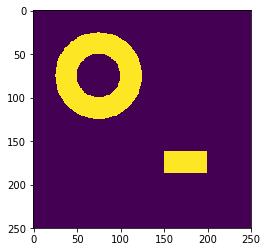

In [320]:
canvas = shape1
canvas = add_shape(canvas, shape2)
plt.imshow(canvas)

In [428]:
rings.

In [174]:
shape_types = ['square', 'circle', 'ellipse', 'rectangle']
np.random.choice(shape_types)

'ellipse'

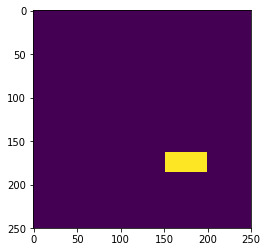

In [1229]:
shapes = to_shapely(mesh, canvas)
plt.imshow(to_numpy(mesh, shapes[1]))

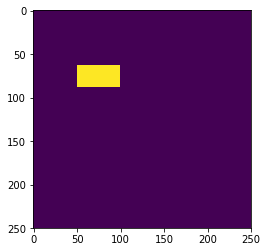

In [1165]:
shape_ring = ring([1.5,1.5],[1.0],[0.5])
shape_box = rectangle([1.5,1.5],1.0,0.5)
shape = to_numpy(mesh,shape_box)
plt.imshow(shape)

In [995]:
exterior

In [983]:
numpy_shape = to_numpy(mesh, exterior)
plt.imshow(numpy_shape)

AttributeError: 'list' object has no attribute 'contains'

In [178]:
x = np.linspace(0,5,250)
y = np.linspace(0,5,250)
xx, yy = np.meshgrid(x,y)
mesh = np.stack([xx,yy],axis=-1)
shape = to_numpy(mesh,ring([1.5,1.5],[1.0],[0.5]))

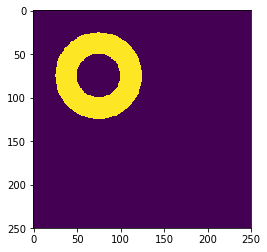

In [179]:
plt.imshow(shape)

In [713]:
for (ix,iy) in np.ndindex(*mesh.shape[:2]):
    print(ix,iy)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 183
0 184


9 212
9 213
9 214
9 215
9 216
9 217
9 218
9 219
9 220
9 221
9 222
9 223
9 224
9 225
9 226
9 227
9 228
9 229
9 230
9 231
9 232
9 233
9 234
9 235
9 236
9 237
9 238
9 239
9 240
9 241
9 242
9 243
9 244
9 245
9 246
9 247
9 248
9 249
10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12
10 13
10 14
10 15
10 16
10 17
10 18
10 19
10 20
10 21
10 22
10 23
10 24
10 25
10 26
10 27
10 28
10 29
10 30
10 31
10 32
10 33
10 34
10 35
10 36
10 37
10 38
10 39
10 40
10 41
10 42
10 43
10 44
10 45
10 46
10 47
10 48
10 49
10 50
10 51
10 52
10 53
10 54
10 55
10 56
10 57
10 58
10 59
10 60
10 61
10 62
10 63
10 64
10 65
10 66
10 67
10 68
10 69
10 70
10 71
10 72
10 73
10 74
10 75
10 76
10 77
10 78
10 79
10 80
10 81
10 82
10 83
10 84
10 85
10 86
10 87
10 88
10 89
10 90
10 91
10 92
10 93
10 94
10 95
10 96
10 97
10 98
10 99
10 100
10 101
10 102
10 103
10 104
10 105
10 106
10 107
10 108
10 109
10 110
10 111
10 112
10 113
10 114
10 115
10 116
10 117
10 118
10 119
10 120
10 121
10 122
10 123
10 124
10 125


14 229
14 230
14 231
14 232
14 233
14 234
14 235
14 236
14 237
14 238
14 239
14 240
14 241
14 242
14 243
14 244
14 245
14 246
14 247
14 248
14 249
15 0
15 1
15 2
15 3
15 4
15 5
15 6
15 7
15 8
15 9
15 10
15 11
15 12
15 13
15 14
15 15
15 16
15 17
15 18
15 19
15 20
15 21
15 22
15 23
15 24
15 25
15 26
15 27
15 28
15 29
15 30
15 31
15 32
15 33
15 34
15 35
15 36
15 37
15 38
15 39
15 40
15 41
15 42
15 43
15 44
15 45
15 46
15 47
15 48
15 49
15 50
15 51
15 52
15 53
15 54
15 55
15 56
15 57
15 58
15 59
15 60
15 61
15 62
15 63
15 64
15 65
15 66
15 67
15 68
15 69
15 70
15 71
15 72
15 73
15 74
15 75
15 76
15 77
15 78
15 79
15 80
15 81
15 82
15 83
15 84
15 85
15 86
15 87
15 88
15 89
15 90
15 91
15 92
15 93
15 94
15 95
15 96
15 97
15 98
15 99
15 100
15 101
15 102
15 103
15 104
15 105
15 106
15 107
15 108
15 109
15 110
15 111
15 112
15 113
15 114
15 115
15 116
15 117
15 118
15 119
15 120
15 121
15 122
15 123
15 124
15 125
15 126
15 127
15 128
15 129
15 130
15 131
15 132
15 133
15 134
15 135
15 136
15 1

20 243
20 244
20 245
20 246
20 247
20 248
20 249
21 0
21 1
21 2
21 3
21 4
21 5
21 6
21 7
21 8
21 9
21 10
21 11
21 12
21 13
21 14
21 15
21 16
21 17
21 18
21 19
21 20
21 21
21 22
21 23
21 24
21 25
21 26
21 27
21 28
21 29
21 30
21 31
21 32
21 33
21 34
21 35
21 36
21 37
21 38
21 39
21 40
21 41
21 42
21 43
21 44
21 45
21 46
21 47
21 48
21 49
21 50
21 51
21 52
21 53
21 54
21 55
21 56
21 57
21 58
21 59
21 60
21 61
21 62
21 63
21 64
21 65
21 66
21 67
21 68
21 69
21 70
21 71
21 72
21 73
21 74
21 75
21 76
21 77
21 78
21 79
21 80
21 81
21 82
21 83
21 84
21 85
21 86
21 87
21 88
21 89
21 90
21 91
21 92
21 93
21 94
21 95
21 96
21 97
21 98
21 99
21 100
21 101
21 102
21 103
21 104
21 105
21 106
21 107
21 108
21 109
21 110
21 111
21 112
21 113
21 114
21 115
21 116
21 117
21 118
21 119
21 120
21 121
21 122
21 123
21 124
21 125
21 126
21 127
21 128
21 129
21 130
21 131
21 132
21 133
21 134
21 135
21 136
21 137
21 138
21 139
21 140
21 141
21 142
21 143
21 144
21 145
21 146
21 147
21 148
21 149
21 150
21 1

31 13
31 14
31 15
31 16
31 17
31 18
31 19
31 20
31 21
31 22
31 23
31 24
31 25
31 26
31 27
31 28
31 29
31 30
31 31
31 32
31 33
31 34
31 35
31 36
31 37
31 38
31 39
31 40
31 41
31 42
31 43
31 44
31 45
31 46
31 47
31 48
31 49
31 50
31 51
31 52
31 53
31 54
31 55
31 56
31 57
31 58
31 59
31 60
31 61
31 62
31 63
31 64
31 65
31 66
31 67
31 68
31 69
31 70
31 71
31 72
31 73
31 74
31 75
31 76
31 77
31 78
31 79
31 80
31 81
31 82
31 83
31 84
31 85
31 86
31 87
31 88
31 89
31 90
31 91
31 92
31 93
31 94
31 95
31 96
31 97
31 98
31 99
31 100
31 101
31 102
31 103
31 104
31 105
31 106
31 107
31 108
31 109
31 110
31 111
31 112
31 113
31 114
31 115
31 116
31 117
31 118
31 119
31 120
31 121
31 122
31 123
31 124
31 125
31 126
31 127
31 128
31 129
31 130
31 131
31 132
31 133
31 134
31 135
31 136
31 137
31 138
31 139
31 140
31 141
31 142
31 143
31 144
31 145
31 146
31 147
31 148
31 149
31 150
31 151
31 152
31 153
31 154
31 155
31 156
31 157
31 158
31 159
31 160
31 161
31 162
31 163
31 164
31 165
31 166
31 167
31

36 242
36 243
36 244
36 245
36 246
36 247
36 248
36 249
37 0
37 1
37 2
37 3
37 4
37 5
37 6
37 7
37 8
37 9
37 10
37 11
37 12
37 13
37 14
37 15
37 16
37 17
37 18
37 19
37 20
37 21
37 22
37 23
37 24
37 25
37 26
37 27
37 28
37 29
37 30
37 31
37 32
37 33
37 34
37 35
37 36
37 37
37 38
37 39
37 40
37 41
37 42
37 43
37 44
37 45
37 46
37 47
37 48
37 49
37 50
37 51
37 52
37 53
37 54
37 55
37 56
37 57
37 58
37 59
37 60
37 61
37 62
37 63
37 64
37 65
37 66
37 67
37 68
37 69
37 70
37 71
37 72
37 73
37 74
37 75
37 76
37 77
37 78
37 79
37 80
37 81
37 82
37 83
37 84
37 85
37 86
37 87
37 88
37 89
37 90
37 91
37 92
37 93
37 94
37 95
37 96
37 97
37 98
37 99
37 100
37 101
37 102
37 103
37 104
37 105
37 106
37 107
37 108
37 109
37 110
37 111
37 112
37 113
37 114
37 115
37 116
37 117
37 118
37 119
37 120
37 121
37 122
37 123
37 124
37 125
37 126
37 127
37 128
37 129
37 130
37 131
37 132
37 133
37 134
37 135
37 136
37 137
37 138
37 139
37 140
37 141
37 142
37 143
37 144
37 145
37 146
37 147
37 148
37 149
37 1

46 184
46 185
46 186
46 187
46 188
46 189
46 190
46 191
46 192
46 193
46 194
46 195
46 196
46 197
46 198
46 199
46 200
46 201
46 202
46 203
46 204
46 205
46 206
46 207
46 208
46 209
46 210
46 211
46 212
46 213
46 214
46 215
46 216
46 217
46 218
46 219
46 220
46 221
46 222
46 223
46 224
46 225
46 226
46 227
46 228
46 229
46 230
46 231
46 232
46 233
46 234
46 235
46 236
46 237
46 238
46 239
46 240
46 241
46 242
46 243
46 244
46 245
46 246
46 247
46 248
46 249
47 0
47 1
47 2
47 3
47 4
47 5
47 6
47 7
47 8
47 9
47 10
47 11
47 12
47 13
47 14
47 15
47 16
47 17
47 18
47 19
47 20
47 21
47 22
47 23
47 24
47 25
47 26
47 27
47 28
47 29
47 30
47 31
47 32
47 33
47 34
47 35
47 36
47 37
47 38
47 39
47 40
47 41
47 42
47 43
47 44
47 45
47 46
47 47
47 48
47 49
47 50
47 51
47 52
47 53
47 54
47 55
47 56
47 57
47 58
47 59
47 60
47 61
47 62
47 63
47 64
47 65
47 66
47 67
47 68
47 69
47 70
47 71
47 72
47 73
47 74
47 75
47 76
47 77
47 78
47 79
47 80
47 81
47 82
47 83
47 84
47 85
47 86
47 87
47 88
47 89
47 90
47

51 235
51 236
51 237
51 238
51 239
51 240
51 241
51 242
51 243
51 244
51 245
51 246
51 247
51 248
51 249
52 0
52 1
52 2
52 3
52 4
52 5
52 6
52 7
52 8
52 9
52 10
52 11
52 12
52 13
52 14
52 15
52 16
52 17
52 18
52 19
52 20
52 21
52 22
52 23
52 24
52 25
52 26
52 27
52 28
52 29
52 30
52 31
52 32
52 33
52 34
52 35
52 36
52 37
52 38
52 39
52 40
52 41
52 42
52 43
52 44
52 45
52 46
52 47
52 48
52 49
52 50
52 51
52 52
52 53
52 54
52 55
52 56
52 57
52 58
52 59
52 60
52 61
52 62
52 63
52 64
52 65
52 66
52 67
52 68
52 69
52 70
52 71
52 72
52 73
52 74
52 75
52 76
52 77
52 78
52 79
52 80
52 81
52 82
52 83
52 84
52 85
52 86
52 87
52 88
52 89
52 90
52 91
52 92
52 93
52 94
52 95
52 96
52 97
52 98
52 99
52 100
52 101
52 102
52 103
52 104
52 105
52 106
52 107
52 108
52 109
52 110
52 111
52 112
52 113
52 114
52 115
52 116
52 117
52 118
52 119
52 120
52 121
52 122
52 123
52 124
52 125
52 126
52 127
52 128
52 129
52 130
52 131
52 132
52 133
52 134
52 135
52 136
52 137
52 138
52 139
52 140
52 141
52 142
52 1

57 53
57 54
57 55
57 56
57 57
57 58
57 59
57 60
57 61
57 62
57 63
57 64
57 65
57 66
57 67
57 68
57 69
57 70
57 71
57 72
57 73
57 74
57 75
57 76
57 77
57 78
57 79
57 80
57 81
57 82
57 83
57 84
57 85
57 86
57 87
57 88
57 89
57 90
57 91
57 92
57 93
57 94
57 95
57 96
57 97
57 98
57 99
57 100
57 101
57 102
57 103
57 104
57 105
57 106
57 107
57 108
57 109
57 110
57 111
57 112
57 113
57 114
57 115
57 116
57 117
57 118
57 119
57 120
57 121
57 122
57 123
57 124
57 125
57 126
57 127
57 128
57 129
57 130
57 131
57 132
57 133
57 134
57 135
57 136
57 137
57 138
57 139
57 140
57 141
57 142
57 143
57 144
57 145
57 146
57 147
57 148
57 149
57 150
57 151
57 152
57 153
57 154
57 155
57 156
57 157
57 158
57 159
57 160
57 161
57 162
57 163
57 164
57 165
57 166
57 167
57 168
57 169
57 170
57 171
57 172
57 173
57 174
57 175
57 176
57 177
57 178
57 179
57 180
57 181
57 182
57 183
57 184
57 185
57 186
57 187
57 188
57 189
57 190
57 191
57 192
57 193
57 194
57 195
57 196
57 197
57 198
57 199
57 200
57 201
57 2

62 181
62 182
62 183
62 184
62 185
62 186
62 187
62 188
62 189
62 190
62 191
62 192
62 193
62 194
62 195
62 196
62 197
62 198
62 199
62 200
62 201
62 202
62 203
62 204
62 205
62 206
62 207
62 208
62 209
62 210
62 211
62 212
62 213
62 214
62 215
62 216
62 217
62 218
62 219
62 220
62 221
62 222
62 223
62 224
62 225
62 226
62 227
62 228
62 229
62 230
62 231
62 232
62 233
62 234
62 235
62 236
62 237
62 238
62 239
62 240
62 241
62 242
62 243
62 244
62 245
62 246
62 247
62 248
62 249
63 0
63 1
63 2
63 3
63 4
63 5
63 6
63 7
63 8
63 9
63 10
63 11
63 12
63 13
63 14
63 15
63 16
63 17
63 18
63 19
63 20
63 21
63 22
63 23
63 24
63 25
63 26
63 27
63 28
63 29
63 30
63 31
63 32
63 33
63 34
63 35
63 36
63 37
63 38
63 39
63 40
63 41
63 42
63 43
63 44
63 45
63 46
63 47
63 48
63 49
63 50
63 51
63 52
63 53
63 54
63 55
63 56
63 57
63 58
63 59
63 60
63 61
63 62
63 63
63 64
63 65
63 66
63 67
63 68
63 69
63 70
63 71
63 72
63 73
63 74
63 75
63 76
63 77
63 78
63 79
63 80
63 81
63 82
63 83
63 84
63 85
63 86
63 87

67 247
67 248
67 249
68 0
68 1
68 2
68 3
68 4
68 5
68 6
68 7
68 8
68 9
68 10
68 11
68 12
68 13
68 14
68 15
68 16
68 17
68 18
68 19
68 20
68 21
68 22
68 23
68 24
68 25
68 26
68 27
68 28
68 29
68 30
68 31
68 32
68 33
68 34
68 35
68 36
68 37
68 38
68 39
68 40
68 41
68 42
68 43
68 44
68 45
68 46
68 47
68 48
68 49
68 50
68 51
68 52
68 53
68 54
68 55
68 56
68 57
68 58
68 59
68 60
68 61
68 62
68 63
68 64
68 65
68 66
68 67
68 68
68 69
68 70
68 71
68 72
68 73
68 74
68 75
68 76
68 77
68 78
68 79
68 80
68 81
68 82
68 83
68 84
68 85
68 86
68 87
68 88
68 89
68 90
68 91
68 92
68 93
68 94
68 95
68 96
68 97
68 98
68 99
68 100
68 101
68 102
68 103
68 104
68 105
68 106
68 107
68 108
68 109
68 110
68 111
68 112
68 113
68 114
68 115
68 116
68 117
68 118
68 119
68 120
68 121
68 122
68 123
68 124
68 125
68 126
68 127
68 128
68 129
68 130
68 131
68 132
68 133
68 134
68 135
68 136
68 137
68 138
68 139
68 140
68 141
68 142
68 143
68 144
68 145
68 146
68 147
68 148
68 149
68 150
68 151
68 152
68 153
68 154
68 1

73 170
73 171
73 172
73 173
73 174
73 175
73 176
73 177
73 178
73 179
73 180
73 181
73 182
73 183
73 184
73 185
73 186
73 187
73 188
73 189
73 190
73 191
73 192
73 193
73 194
73 195
73 196
73 197
73 198
73 199
73 200
73 201
73 202
73 203
73 204
73 205
73 206
73 207
73 208
73 209
73 210
73 211
73 212
73 213
73 214
73 215
73 216
73 217
73 218
73 219
73 220
73 221
73 222
73 223
73 224
73 225
73 226
73 227
73 228
73 229
73 230
73 231
73 232
73 233
73 234
73 235
73 236
73 237
73 238
73 239
73 240
73 241
73 242
73 243
73 244
73 245
73 246
73 247
73 248
73 249
74 0
74 1
74 2
74 3
74 4
74 5
74 6
74 7
74 8
74 9
74 10
74 11
74 12
74 13
74 14
74 15
74 16
74 17
74 18
74 19
74 20
74 21
74 22
74 23
74 24
74 25
74 26
74 27
74 28
74 29
74 30
74 31
74 32
74 33
74 34
74 35
74 36
74 37
74 38
74 39
74 40
74 41
74 42
74 43
74 44
74 45
74 46
74 47
74 48
74 49
74 50
74 51
74 52
74 53
74 54
74 55
74 56
74 57
74 58
74 59
74 60
74 61
74 62
74 63
74 64
74 65
74 66
74 67
74 68
74 69
74 70
74 71
74 72
74 73
74 74


78 222
78 223
78 224
78 225
78 226
78 227
78 228
78 229
78 230
78 231
78 232
78 233
78 234
78 235
78 236
78 237
78 238
78 239
78 240
78 241
78 242
78 243
78 244
78 245
78 246
78 247
78 248
78 249
79 0
79 1
79 2
79 3
79 4
79 5
79 6
79 7
79 8
79 9
79 10
79 11
79 12
79 13
79 14
79 15
79 16
79 17
79 18
79 19
79 20
79 21
79 22
79 23
79 24
79 25
79 26
79 27
79 28
79 29
79 30
79 31
79 32
79 33
79 34
79 35
79 36
79 37
79 38
79 39
79 40
79 41
79 42
79 43
79 44
79 45
79 46
79 47
79 48
79 49
79 50
79 51
79 52
79 53
79 54
79 55
79 56
79 57
79 58
79 59
79 60
79 61
79 62
79 63
79 64
79 65
79 66
79 67
79 68
79 69
79 70
79 71
79 72
79 73
79 74
79 75
79 76
79 77
79 78
79 79
79 80
79 81
79 82
79 83
79 84
79 85
79 86
79 87
79 88
79 89
79 90
79 91
79 92
79 93
79 94
79 95
79 96
79 97
79 98
79 99
79 100
79 101
79 102
79 103
79 104
79 105
79 106
79 107
79 108
79 109
79 110
79 111
79 112
79 113
79 114
79 115
79 116
79 117
79 118
79 119
79 120
79 121
79 122
79 123
79 124
79 125
79 126
79 127
79 128
79 129
79 1

84 99
84 100
84 101
84 102
84 103
84 104
84 105
84 106
84 107
84 108
84 109
84 110
84 111
84 112
84 113
84 114
84 115
84 116
84 117
84 118
84 119
84 120
84 121
84 122
84 123
84 124
84 125
84 126
84 127
84 128
84 129
84 130
84 131
84 132
84 133
84 134
84 135
84 136
84 137
84 138
84 139
84 140
84 141
84 142
84 143
84 144
84 145
84 146
84 147
84 148
84 149
84 150
84 151
84 152
84 153
84 154
84 155
84 156
84 157
84 158
84 159
84 160
84 161
84 162
84 163
84 164
84 165
84 166
84 167
84 168
84 169
84 170
84 171
84 172
84 173
84 174
84 175
84 176
84 177
84 178
84 179
84 180
84 181
84 182
84 183
84 184
84 185
84 186
84 187
84 188
84 189
84 190
84 191
84 192
84 193
84 194
84 195
84 196
84 197
84 198
84 199
84 200
84 201
84 202
84 203
84 204
84 205
84 206
84 207
84 208
84 209
84 210
84 211
84 212
84 213
84 214
84 215
84 216
84 217
84 218
84 219
84 220
84 221
84 222
84 223
84 224
84 225
84 226
84 227
84 228
84 229
84 230
84 231
84 232
84 233
84 234
84 235
84 236
84 237
84 238
84 239
84 240
84 241


94 144
94 145
94 146
94 147
94 148
94 149
94 150
94 151
94 152
94 153
94 154
94 155
94 156
94 157
94 158
94 159
94 160
94 161
94 162
94 163
94 164
94 165
94 166
94 167
94 168
94 169
94 170
94 171
94 172
94 173
94 174
94 175
94 176
94 177
94 178
94 179
94 180
94 181
94 182
94 183
94 184
94 185
94 186
94 187
94 188
94 189
94 190
94 191
94 192
94 193
94 194
94 195
94 196
94 197
94 198
94 199
94 200
94 201
94 202
94 203
94 204
94 205
94 206
94 207
94 208
94 209
94 210
94 211
94 212
94 213
94 214
94 215
94 216
94 217
94 218
94 219
94 220
94 221
94 222
94 223
94 224
94 225
94 226
94 227
94 228
94 229
94 230
94 231
94 232
94 233
94 234
94 235
94 236
94 237
94 238
94 239
94 240
94 241
94 242
94 243
94 244
94 245
94 246
94 247
94 248
94 249
95 0
95 1
95 2
95 3
95 4
95 5
95 6
95 7
95 8
95 9
95 10
95 11
95 12
95 13
95 14
95 15
95 16
95 17
95 18
95 19
95 20
95 21
95 22
95 23
95 24
95 25
95 26
95 27
95 28
95 29
95 30
95 31
95 32
95 33
95 34
95 35
95 36
95 37
95 38
95 39
95 40
95 41
95 42
95 43
95 4

99 230
99 231
99 232
99 233
99 234
99 235
99 236
99 237
99 238
99 239
99 240
99 241
99 242
99 243
99 244
99 245
99 246
99 247
99 248
99 249
100 0
100 1
100 2
100 3
100 4
100 5
100 6
100 7
100 8
100 9
100 10
100 11
100 12
100 13
100 14
100 15
100 16
100 17
100 18
100 19
100 20
100 21
100 22
100 23
100 24
100 25
100 26
100 27
100 28
100 29
100 30
100 31
100 32
100 33
100 34
100 35
100 36
100 37
100 38
100 39
100 40
100 41
100 42
100 43
100 44
100 45
100 46
100 47
100 48
100 49
100 50
100 51
100 52
100 53
100 54
100 55
100 56
100 57
100 58
100 59
100 60
100 61
100 62
100 63
100 64
100 65
100 66
100 67
100 68
100 69
100 70
100 71
100 72
100 73
100 74
100 75
100 76
100 77
100 78
100 79
100 80
100 81
100 82
100 83
100 84
100 85
100 86
100 87
100 88
100 89
100 90
100 91
100 92
100 93
100 94
100 95
100 96
100 97
100 98
100 99
100 100
100 101
100 102
100 103
100 104
100 105
100 106
100 107
100 108
100 109
100 110
100 111
100 112
100 113
100 114
100 115
100 116
100 117
100 118
100 119
100 120
10

105 239
105 240
105 241
105 242
105 243
105 244
105 245
105 246
105 247
105 248
105 249
106 0
106 1
106 2
106 3
106 4
106 5
106 6
106 7
106 8
106 9
106 10
106 11
106 12
106 13
106 14
106 15
106 16
106 17
106 18
106 19
106 20
106 21
106 22
106 23
106 24
106 25
106 26
106 27
106 28
106 29
106 30
106 31
106 32
106 33
106 34
106 35
106 36
106 37
106 38
106 39
106 40
106 41
106 42
106 43
106 44
106 45
106 46
106 47
106 48
106 49
106 50
106 51
106 52
106 53
106 54
106 55
106 56
106 57
106 58
106 59
106 60
106 61
106 62
106 63
106 64
106 65
106 66
106 67
106 68
106 69
106 70
106 71
106 72
106 73
106 74
106 75
106 76
106 77
106 78
106 79
106 80
106 81
106 82
106 83
106 84
106 85
106 86
106 87
106 88
106 89
106 90
106 91
106 92
106 93
106 94
106 95
106 96
106 97
106 98
106 99
106 100
106 101
106 102
106 103
106 104
106 105
106 106
106 107
106 108
106 109
106 110
106 111
106 112
106 113
106 114
106 115
106 116
106 117
106 118
106 119
106 120
106 121
106 122
106 123
106 124
106 125
106 126
106 12

110 202
110 203
110 204
110 205
110 206
110 207
110 208
110 209
110 210
110 211
110 212
110 213
110 214
110 215
110 216
110 217
110 218
110 219
110 220
110 221
110 222
110 223
110 224
110 225
110 226
110 227
110 228
110 229
110 230
110 231
110 232
110 233
110 234
110 235
110 236
110 237
110 238
110 239
110 240
110 241
110 242
110 243
110 244
110 245
110 246
110 247
110 248
110 249
111 0
111 1
111 2
111 3
111 4
111 5
111 6
111 7
111 8
111 9
111 10
111 11
111 12
111 13
111 14
111 15
111 16
111 17
111 18
111 19
111 20
111 21
111 22
111 23
111 24
111 25
111 26
111 27
111 28
111 29
111 30
111 31
111 32
111 33
111 34
111 35
111 36
111 37
111 38
111 39
111 40
111 41
111 42
111 43
111 44
111 45
111 46
111 47
111 48
111 49
111 50
111 51
111 52
111 53
111 54
111 55
111 56
111 57
111 58
111 59
111 60
111 61
111 62
111 63
111 64
111 65
111 66
111 67
111 68
111 69
111 70
111 71
111 72
111 73
111 74
111 75
111 76
111 77
111 78
111 79
111 80
111 81
111 82
111 83
111 84
111 85
111 86
111 87
111 88
111

115 138
115 139
115 140
115 141
115 142
115 143
115 144
115 145
115 146
115 147
115 148
115 149
115 150
115 151
115 152
115 153
115 154
115 155
115 156
115 157
115 158
115 159
115 160
115 161
115 162
115 163
115 164
115 165
115 166
115 167
115 168
115 169
115 170
115 171
115 172
115 173
115 174
115 175
115 176
115 177
115 178
115 179
115 180
115 181
115 182
115 183
115 184
115 185
115 186
115 187
115 188
115 189
115 190
115 191
115 192
115 193
115 194
115 195
115 196
115 197
115 198
115 199
115 200
115 201
115 202
115 203
115 204
115 205
115 206
115 207
115 208
115 209
115 210
115 211
115 212
115 213
115 214
115 215
115 216
115 217
115 218
115 219
115 220
115 221
115 222
115 223
115 224
115 225
115 226
115 227
115 228
115 229
115 230
115 231
115 232
115 233
115 234
115 235
115 236
115 237
115 238
115 239
115 240
115 241
115 242
115 243
115 244
115 245
115 246
115 247
115 248
115 249
116 0
116 1
116 2
116 3
116 4
116 5
116 6
116 7
116 8
116 9
116 10
116 11
116 12
116 13
116 14
116 15
11

121 109
121 110
121 111
121 112
121 113
121 114
121 115
121 116
121 117
121 118
121 119
121 120
121 121
121 122
121 123
121 124
121 125
121 126
121 127
121 128
121 129
121 130
121 131
121 132
121 133
121 134
121 135
121 136
121 137
121 138
121 139
121 140
121 141
121 142
121 143
121 144
121 145
121 146
121 147
121 148
121 149
121 150
121 151
121 152
121 153
121 154
121 155
121 156
121 157
121 158
121 159
121 160
121 161
121 162
121 163
121 164
121 165
121 166
121 167
121 168
121 169
121 170
121 171
121 172
121 173
121 174
121 175
121 176
121 177
121 178
121 179
121 180
121 181
121 182
121 183
121 184
121 185
121 186
121 187
121 188
121 189
121 190
121 191
121 192
121 193
121 194
121 195
121 196
121 197
121 198
121 199
121 200
121 201
121 202
121 203
121 204
121 205
121 206
121 207
121 208
121 209
121 210
121 211
121 212
121 213
121 214
121 215
121 216
121 217
121 218
121 219
121 220
121 221
121 222
121 223
121 224
121 225
121 226
121 227
121 228
121 229
121 230
121 231
121 232
121 233


126 39
126 40
126 41
126 42
126 43
126 44
126 45
126 46
126 47
126 48
126 49
126 50
126 51
126 52
126 53
126 54
126 55
126 56
126 57
126 58
126 59
126 60
126 61
126 62
126 63
126 64
126 65
126 66
126 67
126 68
126 69
126 70
126 71
126 72
126 73
126 74
126 75
126 76
126 77
126 78
126 79
126 80
126 81
126 82
126 83
126 84
126 85
126 86
126 87
126 88
126 89
126 90
126 91
126 92
126 93
126 94
126 95
126 96
126 97
126 98
126 99
126 100
126 101
126 102
126 103
126 104
126 105
126 106
126 107
126 108
126 109
126 110
126 111
126 112
126 113
126 114
126 115
126 116
126 117
126 118
126 119
126 120
126 121
126 122
126 123
126 124
126 125
126 126
126 127
126 128
126 129
126 130
126 131
126 132
126 133
126 134
126 135
126 136
126 137
126 138
126 139
126 140
126 141
126 142
126 143
126 144
126 145
126 146
126 147
126 148
126 149
126 150
126 151
126 152
126 153
126 154
126 155
126 156
126 157
126 158
126 159
126 160
126 161
126 162
126 163
126 164
126 165
126 166
126 167
126 168
126 169
126 170
126 1

131 123
131 124
131 125
131 126
131 127
131 128
131 129
131 130
131 131
131 132
131 133
131 134
131 135
131 136
131 137
131 138
131 139
131 140
131 141
131 142
131 143
131 144
131 145
131 146
131 147
131 148
131 149
131 150
131 151
131 152
131 153
131 154
131 155
131 156
131 157
131 158
131 159
131 160
131 161
131 162
131 163
131 164
131 165
131 166
131 167
131 168
131 169
131 170
131 171
131 172
131 173
131 174
131 175
131 176
131 177
131 178
131 179
131 180
131 181
131 182
131 183
131 184
131 185
131 186
131 187
131 188
131 189
131 190
131 191
131 192
131 193
131 194
131 195
131 196
131 197
131 198
131 199
131 200
131 201
131 202
131 203
131 204
131 205
131 206
131 207
131 208
131 209
131 210
131 211
131 212
131 213
131 214
131 215
131 216
131 217
131 218
131 219
131 220
131 221
131 222
131 223
131 224
131 225
131 226
131 227
131 228
131 229
131 230
131 231
131 232
131 233
131 234
131 235
131 236
131 237
131 238
131 239
131 240
131 241
131 242
131 243
131 244
131 245
131 246
131 247


135 211
135 212
135 213
135 214
135 215
135 216
135 217
135 218
135 219
135 220
135 221
135 222
135 223
135 224
135 225
135 226
135 227
135 228
135 229
135 230
135 231
135 232
135 233
135 234
135 235
135 236
135 237
135 238
135 239
135 240
135 241
135 242
135 243
135 244
135 245
135 246
135 247
135 248
135 249
136 0
136 1
136 2
136 3
136 4
136 5
136 6
136 7
136 8
136 9
136 10
136 11
136 12
136 13
136 14
136 15
136 16
136 17
136 18
136 19
136 20
136 21
136 22
136 23
136 24
136 25
136 26
136 27
136 28
136 29
136 30
136 31
136 32
136 33
136 34
136 35
136 36
136 37
136 38
136 39
136 40
136 41
136 42
136 43
136 44
136 45
136 46
136 47
136 48
136 49
136 50
136 51
136 52
136 53
136 54
136 55
136 56
136 57
136 58
136 59
136 60
136 61
136 62
136 63
136 64
136 65
136 66
136 67
136 68
136 69
136 70
136 71
136 72
136 73
136 74
136 75
136 76
136 77
136 78
136 79
136 80
136 81
136 82
136 83
136 84
136 85
136 86
136 87
136 88
136 89
136 90
136 91
136 92
136 93
136 94
136 95
136 96
136 97
136 98
136 9

140 237
140 238
140 239
140 240
140 241
140 242
140 243
140 244
140 245
140 246
140 247
140 248
140 249
141 0
141 1
141 2
141 3
141 4
141 5
141 6
141 7
141 8
141 9
141 10
141 11
141 12
141 13
141 14
141 15
141 16
141 17
141 18
141 19
141 20
141 21
141 22
141 23
141 24
141 25
141 26
141 27
141 28
141 29
141 30
141 31
141 32
141 33
141 34
141 35
141 36
141 37
141 38
141 39
141 40
141 41
141 42
141 43
141 44
141 45
141 46
141 47
141 48
141 49
141 50
141 51
141 52
141 53
141 54
141 55
141 56
141 57
141 58
141 59
141 60
141 61
141 62
141 63
141 64
141 65
141 66
141 67
141 68
141 69
141 70
141 71
141 72
141 73
141 74
141 75
141 76
141 77
141 78
141 79
141 80
141 81
141 82
141 83
141 84
141 85
141 86
141 87
141 88
141 89
141 90
141 91
141 92
141 93
141 94
141 95
141 96
141 97
141 98
141 99
141 100
141 101
141 102
141 103
141 104
141 105
141 106
141 107
141 108
141 109
141 110
141 111
141 112
141 113
141 114
141 115
141 116
141 117
141 118
141 119
141 120
141 121
141 122
141 123
141 124
141 12

145 142
145 143
145 144
145 145
145 146
145 147
145 148
145 149
145 150
145 151
145 152
145 153
145 154
145 155
145 156
145 157
145 158
145 159
145 160
145 161
145 162
145 163
145 164
145 165
145 166
145 167
145 168
145 169
145 170
145 171
145 172
145 173
145 174
145 175
145 176
145 177
145 178
145 179
145 180
145 181
145 182
145 183
145 184
145 185
145 186
145 187
145 188
145 189
145 190
145 191
145 192
145 193
145 194
145 195
145 196
145 197
145 198
145 199
145 200
145 201
145 202
145 203
145 204
145 205
145 206
145 207
145 208
145 209
145 210
145 211
145 212
145 213
145 214
145 215
145 216
145 217
145 218
145 219
145 220
145 221
145 222
145 223
145 224
145 225
145 226
145 227
145 228
145 229
145 230
145 231
145 232
145 233
145 234
145 235
145 236
145 237
145 238
145 239
145 240
145 241
145 242
145 243
145 244
145 245
145 246
145 247
145 248
145 249
146 0
146 1
146 2
146 3
146 4
146 5
146 6
146 7
146 8
146 9
146 10
146 11
146 12
146 13
146 14
146 15
146 16
146 17
146 18
146 19
146 20

150 35
150 36
150 37
150 38
150 39
150 40
150 41
150 42
150 43
150 44
150 45
150 46
150 47
150 48
150 49
150 50
150 51
150 52
150 53
150 54
150 55
150 56
150 57
150 58
150 59
150 60
150 61
150 62
150 63
150 64
150 65
150 66
150 67
150 68
150 69
150 70
150 71
150 72
150 73
150 74
150 75
150 76
150 77
150 78
150 79
150 80
150 81
150 82
150 83
150 84
150 85
150 86
150 87
150 88
150 89
150 90
150 91
150 92
150 93
150 94
150 95
150 96
150 97
150 98
150 99
150 100
150 101
150 102
150 103
150 104
150 105
150 106
150 107
150 108
150 109
150 110
150 111
150 112
150 113
150 114
150 115
150 116
150 117
150 118
150 119
150 120
150 121
150 122
150 123
150 124
150 125
150 126
150 127
150 128
150 129
150 130
150 131
150 132
150 133
150 134
150 135
150 136
150 137
150 138
150 139
150 140
150 141
150 142
150 143
150 144
150 145
150 146
150 147
150 148
150 149
150 150
150 151
150 152
150 153
150 154
150 155
150 156
150 157
150 158
150 159
150 160
150 161
150 162
150 163
150 164
150 165
150 166
150 167
1

155 10
155 11
155 12
155 13
155 14
155 15
155 16
155 17
155 18
155 19
155 20
155 21
155 22
155 23
155 24
155 25
155 26
155 27
155 28
155 29
155 30
155 31
155 32
155 33
155 34
155 35
155 36
155 37
155 38
155 39
155 40
155 41
155 42
155 43
155 44
155 45
155 46
155 47
155 48
155 49
155 50
155 51
155 52
155 53
155 54
155 55
155 56
155 57
155 58
155 59
155 60
155 61
155 62
155 63
155 64
155 65
155 66
155 67
155 68
155 69
155 70
155 71
155 72
155 73
155 74
155 75
155 76
155 77
155 78
155 79
155 80
155 81
155 82
155 83
155 84
155 85
155 86
155 87
155 88
155 89
155 90
155 91
155 92
155 93
155 94
155 95
155 96
155 97
155 98
155 99
155 100
155 101
155 102
155 103
155 104
155 105
155 106
155 107
155 108
155 109
155 110
155 111
155 112
155 113
155 114
155 115
155 116
155 117
155 118
155 119
155 120
155 121
155 122
155 123
155 124
155 125
155 126
155 127
155 128
155 129
155 130
155 131
155 132
155 133
155 134
155 135
155 136
155 137
155 138
155 139
155 140
155 141
155 142
155 143
155 144
155 145
15

159 159
159 160
159 161
159 162
159 163
159 164
159 165
159 166
159 167
159 168
159 169
159 170
159 171
159 172
159 173
159 174
159 175
159 176
159 177
159 178
159 179
159 180
159 181
159 182
159 183
159 184
159 185
159 186
159 187
159 188
159 189
159 190
159 191
159 192
159 193
159 194
159 195
159 196
159 197
159 198
159 199
159 200
159 201
159 202
159 203
159 204
159 205
159 206
159 207
159 208
159 209
159 210
159 211
159 212
159 213
159 214
159 215
159 216
159 217
159 218
159 219
159 220
159 221
159 222
159 223
159 224
159 225
159 226
159 227
159 228
159 229
159 230
159 231
159 232
159 233
159 234
159 235
159 236
159 237
159 238
159 239
159 240
159 241
159 242
159 243
159 244
159 245
159 246
159 247
159 248
159 249
160 0
160 1
160 2
160 3
160 4
160 5
160 6
160 7
160 8
160 9
160 10
160 11
160 12
160 13
160 14
160 15
160 16
160 17
160 18
160 19
160 20
160 21
160 22
160 23
160 24
160 25
160 26
160 27
160 28
160 29
160 30
160 31
160 32
160 33
160 34
160 35
160 36
160 37
160 38
160 39
16

164 127
164 128
164 129
164 130
164 131
164 132
164 133
164 134
164 135
164 136
164 137
164 138
164 139
164 140
164 141
164 142
164 143
164 144
164 145
164 146
164 147
164 148
164 149
164 150
164 151
164 152
164 153
164 154
164 155
164 156
164 157
164 158
164 159
164 160
164 161
164 162
164 163
164 164
164 165
164 166
164 167
164 168
164 169
164 170
164 171
164 172
164 173
164 174
164 175
164 176
164 177
164 178
164 179
164 180
164 181
164 182
164 183
164 184
164 185
164 186
164 187
164 188
164 189
164 190
164 191
164 192
164 193
164 194
164 195
164 196
164 197
164 198
164 199
164 200
164 201
164 202
164 203
164 204
164 205
164 206
164 207
164 208
164 209
164 210
164 211
164 212
164 213
164 214
164 215
164 216
164 217
164 218
164 219
164 220
164 221
164 222
164 223
164 224
164 225
164 226
164 227
164 228
164 229
164 230
164 231
164 232
164 233
164 234
164 235
164 236
164 237
164 238
164 239
164 240
164 241
164 242
164 243
164 244
164 245
164 246
164 247
164 248
164 249
165 0
165 1
165 

169 93
169 94
169 95
169 96
169 97
169 98
169 99
169 100
169 101
169 102
169 103
169 104
169 105
169 106
169 107
169 108
169 109
169 110
169 111
169 112
169 113
169 114
169 115
169 116
169 117
169 118
169 119
169 120
169 121
169 122
169 123
169 124
169 125
169 126
169 127
169 128
169 129
169 130
169 131
169 132
169 133
169 134
169 135
169 136
169 137
169 138
169 139
169 140
169 141
169 142
169 143
169 144
169 145
169 146
169 147
169 148
169 149
169 150
169 151
169 152
169 153
169 154
169 155
169 156
169 157
169 158
169 159
169 160
169 161
169 162
169 163
169 164
169 165
169 166
169 167
169 168
169 169
169 170
169 171
169 172
169 173
169 174
169 175
169 176
169 177
169 178
169 179
169 180
169 181
169 182
169 183
169 184
169 185
169 186
169 187
169 188
169 189
169 190
169 191
169 192
169 193
169 194
169 195
169 196
169 197
169 198
169 199
169 200
169 201
169 202
169 203
169 204
169 205
169 206
169 207
169 208
169 209
169 210
169 211
169 212
169 213
169 214
169 215
169 216
169 217
169 218

174 113
174 114
174 115
174 116
174 117
174 118
174 119
174 120
174 121
174 122
174 123
174 124
174 125
174 126
174 127
174 128
174 129
174 130
174 131
174 132
174 133
174 134
174 135
174 136
174 137
174 138
174 139
174 140
174 141
174 142
174 143
174 144
174 145
174 146
174 147
174 148
174 149
174 150
174 151
174 152
174 153
174 154
174 155
174 156
174 157
174 158
174 159
174 160
174 161
174 162
174 163
174 164
174 165
174 166
174 167
174 168
174 169
174 170
174 171
174 172
174 173
174 174
174 175
174 176
174 177
174 178
174 179
174 180
174 181
174 182
174 183
174 184
174 185
174 186
174 187
174 188
174 189
174 190
174 191
174 192
174 193
174 194
174 195
174 196
174 197
174 198
174 199
174 200
174 201
174 202
174 203
174 204
174 205
174 206
174 207
174 208
174 209
174 210
174 211
174 212
174 213
174 214
174 215
174 216
174 217
174 218
174 219
174 220
174 221
174 222
174 223
174 224
174 225
174 226
174 227
174 228
174 229
174 230
174 231
174 232
174 233
174 234
174 235
174 236
174 237


179 69
179 70
179 71
179 72
179 73
179 74
179 75
179 76
179 77
179 78
179 79
179 80
179 81
179 82
179 83
179 84
179 85
179 86
179 87
179 88
179 89
179 90
179 91
179 92
179 93
179 94
179 95
179 96
179 97
179 98
179 99
179 100
179 101
179 102
179 103
179 104
179 105
179 106
179 107
179 108
179 109
179 110
179 111
179 112
179 113
179 114
179 115
179 116
179 117
179 118
179 119
179 120
179 121
179 122
179 123
179 124
179 125
179 126
179 127
179 128
179 129
179 130
179 131
179 132
179 133
179 134
179 135
179 136
179 137
179 138
179 139
179 140
179 141
179 142
179 143
179 144
179 145
179 146
179 147
179 148
179 149
179 150
179 151
179 152
179 153
179 154
179 155
179 156
179 157
179 158
179 159
179 160
179 161
179 162
179 163
179 164
179 165
179 166
179 167
179 168
179 169
179 170
179 171
179 172
179 173
179 174
179 175
179 176
179 177
179 178
179 179
179 180
179 181
179 182
179 183
179 184
179 185
179 186
179 187
179 188
179 189
179 190
179 191
179 192
179 193
179 194
179 195
179 196
179 197

185 66
185 67
185 68
185 69
185 70
185 71
185 72
185 73
185 74
185 75
185 76
185 77
185 78
185 79
185 80
185 81
185 82
185 83
185 84
185 85
185 86
185 87
185 88
185 89
185 90
185 91
185 92
185 93
185 94
185 95
185 96
185 97
185 98
185 99
185 100
185 101
185 102
185 103
185 104
185 105
185 106
185 107
185 108
185 109
185 110
185 111
185 112
185 113
185 114
185 115
185 116
185 117
185 118
185 119
185 120
185 121
185 122
185 123
185 124
185 125
185 126
185 127
185 128
185 129
185 130
185 131
185 132
185 133
185 134
185 135
185 136
185 137
185 138
185 139
185 140
185 141
185 142
185 143
185 144
185 145
185 146
185 147
185 148
185 149
185 150
185 151
185 152
185 153
185 154
185 155
185 156
185 157
185 158
185 159
185 160
185 161
185 162
185 163
185 164
185 165
185 166
185 167
185 168
185 169
185 170
185 171
185 172
185 173
185 174
185 175
185 176
185 177
185 178
185 179
185 180
185 181
185 182
185 183
185 184
185 185
185 186
185 187
185 188
185 189
185 190
185 191
185 192
185 193
185 194
18

190 230
190 231
190 232
190 233
190 234
190 235
190 236
190 237
190 238
190 239
190 240
190 241
190 242
190 243
190 244
190 245
190 246
190 247
190 248
190 249
191 0
191 1
191 2
191 3
191 4
191 5
191 6
191 7
191 8
191 9
191 10
191 11
191 12
191 13
191 14
191 15
191 16
191 17
191 18
191 19
191 20
191 21
191 22
191 23
191 24
191 25
191 26
191 27
191 28
191 29
191 30
191 31
191 32
191 33
191 34
191 35
191 36
191 37
191 38
191 39
191 40
191 41
191 42
191 43
191 44
191 45
191 46
191 47
191 48
191 49
191 50
191 51
191 52
191 53
191 54
191 55
191 56
191 57
191 58
191 59
191 60
191 61
191 62
191 63
191 64
191 65
191 66
191 67
191 68
191 69
191 70
191 71
191 72
191 73
191 74
191 75
191 76
191 77
191 78
191 79
191 80
191 81
191 82
191 83
191 84
191 85
191 86
191 87
191 88
191 89
191 90
191 91
191 92
191 93
191 94
191 95
191 96
191 97
191 98
191 99
191 100
191 101
191 102
191 103
191 104
191 105
191 106
191 107
191 108
191 109
191 110
191 111
191 112
191 113
191 114
191 115
191 116
191 117
191 11

196 203
196 204
196 205
196 206
196 207
196 208
196 209
196 210
196 211
196 212
196 213
196 214
196 215
196 216
196 217
196 218
196 219
196 220
196 221
196 222
196 223
196 224
196 225
196 226
196 227
196 228
196 229
196 230
196 231
196 232
196 233
196 234
196 235
196 236
196 237
196 238
196 239
196 240
196 241
196 242
196 243
196 244
196 245
196 246
196 247
196 248
196 249
197 0
197 1
197 2
197 3
197 4
197 5
197 6
197 7
197 8
197 9
197 10
197 11
197 12
197 13
197 14
197 15
197 16
197 17
197 18
197 19
197 20
197 21
197 22
197 23
197 24
197 25
197 26
197 27
197 28
197 29
197 30
197 31
197 32
197 33
197 34
197 35
197 36
197 37
197 38
197 39
197 40
197 41
197 42
197 43
197 44
197 45
197 46
197 47
197 48
197 49
197 50
197 51
197 52
197 53
197 54
197 55
197 56
197 57
197 58
197 59
197 60
197 61
197 62
197 63
197 64
197 65
197 66
197 67
197 68
197 69
197 70
197 71
197 72
197 73
197 74
197 75
197 76
197 77
197 78
197 79
197 80
197 81
197 82
197 83
197 84
197 85
197 86
197 87
197 88
197 89
197 

202 91
202 92
202 93
202 94
202 95
202 96
202 97
202 98
202 99
202 100
202 101
202 102
202 103
202 104
202 105
202 106
202 107
202 108
202 109
202 110
202 111
202 112
202 113
202 114
202 115
202 116
202 117
202 118
202 119
202 120
202 121
202 122
202 123
202 124
202 125
202 126
202 127
202 128
202 129
202 130
202 131
202 132
202 133
202 134
202 135
202 136
202 137
202 138
202 139
202 140
202 141
202 142
202 143
202 144
202 145
202 146
202 147
202 148
202 149
202 150
202 151
202 152
202 153
202 154
202 155
202 156
202 157
202 158
202 159
202 160
202 161
202 162
202 163
202 164
202 165
202 166
202 167
202 168
202 169
202 170
202 171
202 172
202 173
202 174
202 175
202 176
202 177
202 178
202 179
202 180
202 181
202 182
202 183
202 184
202 185
202 186
202 187
202 188
202 189
202 190
202 191
202 192
202 193
202 194
202 195
202 196
202 197
202 198
202 199
202 200
202 201
202 202
202 203
202 204
202 205
202 206
202 207
202 208
202 209
202 210
202 211
202 212
202 213
202 214
202 215
202 216
2

208 11
208 12
208 13
208 14
208 15
208 16
208 17
208 18
208 19
208 20
208 21
208 22
208 23
208 24
208 25
208 26
208 27
208 28
208 29
208 30
208 31
208 32
208 33
208 34
208 35
208 36
208 37
208 38
208 39
208 40
208 41
208 42
208 43
208 44
208 45
208 46
208 47
208 48
208 49
208 50
208 51
208 52
208 53
208 54
208 55
208 56
208 57
208 58
208 59
208 60
208 61
208 62
208 63
208 64
208 65
208 66
208 67
208 68
208 69
208 70
208 71
208 72
208 73
208 74
208 75
208 76
208 77
208 78
208 79
208 80
208 81
208 82
208 83
208 84
208 85
208 86
208 87
208 88
208 89
208 90
208 91
208 92
208 93
208 94
208 95
208 96
208 97
208 98
208 99
208 100
208 101
208 102
208 103
208 104
208 105
208 106
208 107
208 108
208 109
208 110
208 111
208 112
208 113
208 114
208 115
208 116
208 117
208 118
208 119
208 120
208 121
208 122
208 123
208 124
208 125
208 126
208 127
208 128
208 129
208 130
208 131
208 132
208 133
208 134
208 135
208 136
208 137
208 138
208 139
208 140
208 141
208 142
208 143
208 144
208 145
208 146
2

213 209
213 210
213 211
213 212
213 213
213 214
213 215
213 216
213 217
213 218
213 219
213 220
213 221
213 222
213 223
213 224
213 225
213 226
213 227
213 228
213 229
213 230
213 231
213 232
213 233
213 234
213 235
213 236
213 237
213 238
213 239
213 240
213 241
213 242
213 243
213 244
213 245
213 246
213 247
213 248
213 249
214 0
214 1
214 2
214 3
214 4
214 5
214 6
214 7
214 8
214 9
214 10
214 11
214 12
214 13
214 14
214 15
214 16
214 17
214 18
214 19
214 20
214 21
214 22
214 23
214 24
214 25
214 26
214 27
214 28
214 29
214 30
214 31
214 32
214 33
214 34
214 35
214 36
214 37
214 38
214 39
214 40
214 41
214 42
214 43
214 44
214 45
214 46
214 47
214 48
214 49
214 50
214 51
214 52
214 53
214 54
214 55
214 56
214 57
214 58
214 59
214 60
214 61
214 62
214 63
214 64
214 65
214 66
214 67
214 68
214 69
214 70
214 71
214 72
214 73
214 74
214 75
214 76
214 77
214 78
214 79
214 80
214 81
214 82
214 83
214 84
214 85
214 86
214 87
214 88
214 89
214 90
214 91
214 92
214 93
214 94
214 95
214 96
214

218 206
218 207
218 208
218 209
218 210
218 211
218 212
218 213
218 214
218 215
218 216
218 217
218 218
218 219
218 220
218 221
218 222
218 223
218 224
218 225
218 226
218 227
218 228
218 229
218 230
218 231
218 232
218 233
218 234
218 235
218 236
218 237
218 238
218 239
218 240
218 241
218 242
218 243
218 244
218 245
218 246
218 247
218 248
218 249
219 0
219 1
219 2
219 3
219 4
219 5
219 6
219 7
219 8
219 9
219 10
219 11
219 12
219 13
219 14
219 15
219 16
219 17
219 18
219 19
219 20
219 21
219 22
219 23
219 24
219 25
219 26
219 27
219 28
219 29
219 30
219 31
219 32
219 33
219 34
219 35
219 36
219 37
219 38
219 39
219 40
219 41
219 42
219 43
219 44
219 45
219 46
219 47
219 48
219 49
219 50
219 51
219 52
219 53
219 54
219 55
219 56
219 57
219 58
219 59
219 60
219 61
219 62
219 63
219 64
219 65
219 66
219 67
219 68
219 69
219 70
219 71
219 72
219 73
219 74
219 75
219 76
219 77
219 78
219 79
219 80
219 81
219 82
219 83
219 84
219 85
219 86
219 87
219 88
219 89
219 90
219 91
219 92
219 93


224 121
224 122
224 123
224 124
224 125
224 126
224 127
224 128
224 129
224 130
224 131
224 132
224 133
224 134
224 135
224 136
224 137
224 138
224 139
224 140
224 141
224 142
224 143
224 144
224 145
224 146
224 147
224 148
224 149
224 150
224 151
224 152
224 153
224 154
224 155
224 156
224 157
224 158
224 159
224 160
224 161
224 162
224 163
224 164
224 165
224 166
224 167
224 168
224 169
224 170
224 171
224 172
224 173
224 174
224 175
224 176
224 177
224 178
224 179
224 180
224 181
224 182
224 183
224 184
224 185
224 186
224 187
224 188
224 189
224 190
224 191
224 192
224 193
224 194
224 195
224 196
224 197
224 198
224 199
224 200
224 201
224 202
224 203
224 204
224 205
224 206
224 207
224 208
224 209
224 210
224 211
224 212
224 213
224 214
224 215
224 216
224 217
224 218
224 219
224 220
224 221
224 222
224 223
224 224
224 225
224 226
224 227
224 228
224 229
224 230
224 231
224 232
224 233
224 234
224 235
224 236
224 237
224 238
224 239
224 240
224 241
224 242
224 243
224 244
224 245


229 231
229 232
229 233
229 234
229 235
229 236
229 237
229 238
229 239
229 240
229 241
229 242
229 243
229 244
229 245
229 246
229 247
229 248
229 249
230 0
230 1
230 2
230 3
230 4
230 5
230 6
230 7
230 8
230 9
230 10
230 11
230 12
230 13
230 14
230 15
230 16
230 17
230 18
230 19
230 20
230 21
230 22
230 23
230 24
230 25
230 26
230 27
230 28
230 29
230 30
230 31
230 32
230 33
230 34
230 35
230 36
230 37
230 38
230 39
230 40
230 41
230 42
230 43
230 44
230 45
230 46
230 47
230 48
230 49
230 50
230 51
230 52
230 53
230 54
230 55
230 56
230 57
230 58
230 59
230 60
230 61
230 62
230 63
230 64
230 65
230 66
230 67
230 68
230 69
230 70
230 71
230 72
230 73
230 74
230 75
230 76
230 77
230 78
230 79
230 80
230 81
230 82
230 83
230 84
230 85
230 86
230 87
230 88
230 89
230 90
230 91
230 92
230 93
230 94
230 95
230 96
230 97
230 98
230 99
230 100
230 101
230 102
230 103
230 104
230 105
230 106
230 107
230 108
230 109
230 110
230 111
230 112
230 113
230 114
230 115
230 116
230 117
230 118
230 11

235 118
235 119
235 120
235 121
235 122
235 123
235 124
235 125
235 126
235 127
235 128
235 129
235 130
235 131
235 132
235 133
235 134
235 135
235 136
235 137
235 138
235 139
235 140
235 141
235 142
235 143
235 144
235 145
235 146
235 147
235 148
235 149
235 150
235 151
235 152
235 153
235 154
235 155
235 156
235 157
235 158
235 159
235 160
235 161
235 162
235 163
235 164
235 165
235 166
235 167
235 168
235 169
235 170
235 171
235 172
235 173
235 174
235 175
235 176
235 177
235 178
235 179
235 180
235 181
235 182
235 183
235 184
235 185
235 186
235 187
235 188
235 189
235 190
235 191
235 192
235 193
235 194
235 195
235 196
235 197
235 198
235 199
235 200
235 201
235 202
235 203
235 204
235 205
235 206
235 207
235 208
235 209
235 210
235 211
235 212
235 213
235 214
235 215
235 216
235 217
235 218
235 219
235 220
235 221
235 222
235 223
235 224
235 225
235 226
235 227
235 228
235 229
235 230
235 231
235 232
235 233
235 234
235 235
235 236
235 237
235 238
235 239
235 240
235 241
235 242


240 209
240 210
240 211
240 212
240 213
240 214
240 215
240 216
240 217
240 218
240 219
240 220
240 221
240 222
240 223
240 224
240 225
240 226
240 227
240 228
240 229
240 230
240 231
240 232
240 233
240 234
240 235
240 236
240 237
240 238
240 239
240 240
240 241
240 242
240 243
240 244
240 245
240 246
240 247
240 248
240 249
241 0
241 1
241 2
241 3
241 4
241 5
241 6
241 7
241 8
241 9
241 10
241 11
241 12
241 13
241 14
241 15
241 16
241 17
241 18
241 19
241 20
241 21
241 22
241 23
241 24
241 25
241 26
241 27
241 28
241 29
241 30
241 31
241 32
241 33
241 34
241 35
241 36
241 37
241 38
241 39
241 40
241 41
241 42
241 43
241 44
241 45
241 46
241 47
241 48
241 49
241 50
241 51
241 52
241 53
241 54
241 55
241 56
241 57
241 58
241 59
241 60
241 61
241 62
241 63
241 64
241 65
241 66
241 67
241 68
241 69
241 70
241 71
241 72
241 73
241 74
241 75
241 76
241 77
241 78
241 79
241 80
241 81
241 82
241 83
241 84
241 85
241 86
241 87
241 88
241 89
241 90
241 91
241 92
241 93
241 94
241 95
241 96
241

246 6
246 7
246 8
246 9
246 10
246 11
246 12
246 13
246 14
246 15
246 16
246 17
246 18
246 19
246 20
246 21
246 22
246 23
246 24
246 25
246 26
246 27
246 28
246 29
246 30
246 31
246 32
246 33
246 34
246 35
246 36
246 37
246 38
246 39
246 40
246 41
246 42
246 43
246 44
246 45
246 46
246 47
246 48
246 49
246 50
246 51
246 52
246 53
246 54
246 55
246 56
246 57
246 58
246 59
246 60
246 61
246 62
246 63
246 64
246 65
246 66
246 67
246 68
246 69
246 70
246 71
246 72
246 73
246 74
246 75
246 76
246 77
246 78
246 79
246 80
246 81
246 82
246 83
246 84
246 85
246 86
246 87
246 88
246 89
246 90
246 91
246 92
246 93
246 94
246 95
246 96
246 97
246 98
246 99
246 100
246 101
246 102
246 103
246 104
246 105
246 106
246 107
246 108
246 109
246 110
246 111
246 112
246 113
246 114
246 115
246 116
246 117
246 118
246 119
246 120
246 121
246 122
246 123
246 124
246 125
246 126
246 127
246 128
246 129
246 130
246 131
246 132
246 133
246 134
246 135
246 136
246 137
246 138
246 139
246 140
246 141
246 142
24

In [934]:
a = [1,2]
a.pop(0)
a

[2]

[3]

In [932]:
[1,2,3].pop

<function list.pop(index=-1, /)>

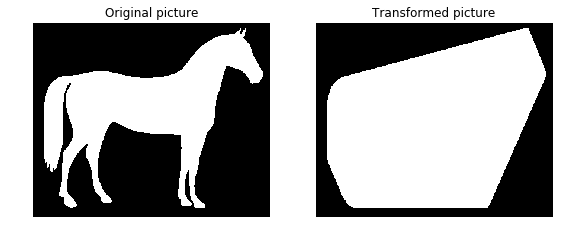

In [175]:
import matplotlib.pyplot as plt

from skimage.morphology import convex_hull_image
from skimage import data, img_as_float
from skimage.util import invert

# The original image is inverted as the object must be white.
image = invert(data.horse())

chull = convex_hull_image(image)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].set_title('Original picture')
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_axis_off()

ax[1].set_title('Transformed picture')
ax[1].imshow(chull, cmap=plt.cm.gray)
ax[1].set_axis_off()

plt.tight_layout()
plt.show()

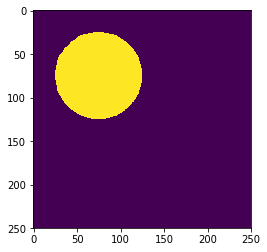

In [181]:
chull = convex_hull_image(shape)
plt.imshow(chull)

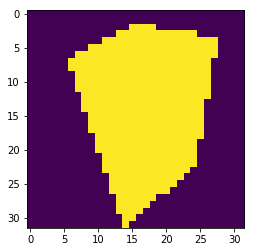

In [319]:
random_rr = np.random.randint(low=0,high=32,size=5)
random_cc = np.random.randint(low=0,high=32,size=5)
points=np.stack([random_rr, random_cc], axis=-1)
canvas = np.zeros([32,32], dtype=np.uint8)
for point in points:
    canvas[point[0], point[1]] = 1
chull = convex_hull_image(canvas)
    
    
plt.imshow(chull)

In [196]:
canvas

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)